### Objectif : Travailler avec des données réelles.
Exercice :
Téléchargez un fichier contenant des données météorologiques historiques.
Écrivez un script pour :
Analyser les variations de température au fil du temps.
Trouver les jours avec la température la plus élevée et la plus basse.
Visualiser les données à l'aide de graphiques (matplotlib).


In [4]:
import pandas as pd
#donnée issu de kaggle
df = pd.read_csv("weatherHistory.csv", sep=",")
print(df)


                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

In [9]:
df = df.dropna()
df = df.rename(columns={"Formatted Date": "Date"})
columns_to_drop = ["Summary", "Precip Type", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Loud Cover", "Pressure (millibars)", "Daily Summary"]
df = df.drop(columns= columns_to_drop)
df

,Date,Temperature (C),Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83
...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,26.016667,0.43
96449,2016-09-09 20:00:00.000 +0200,24.583333,24.583333,0.48
96450,2016-09-09 21:00:00.000 +0200,22.038889,22.038889,0.56
96451,2016-09-09 22:00:00.000 +0200,21.522222,21.522222,0.60


In [14]:
df = df.drop_duplicates()
df

,Date,Temperature (C),Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89
1,2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86
2,2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89
3,2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83
4,2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83
...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,26.016667,26.016667,0.43
96449,2016-09-09 20:00:00+02:00,24.583333,24.583333,0.48
96450,2016-09-09 21:00:00+02:00,22.038889,22.038889,0.56
96451,2016-09-09 22:00:00+02:00,21.522222,21.522222,0.60


In [52]:
df["Date"] = pd.to_datetime(df["Date"], utc=True) 
df['Date'] = df['Date'].dt.tz_localize(None) #mettre utc a OO
df['Date'] = df['Date'].dt.date #extraire la date

df.head()

,Date,Temperature (C),Apparent Temperature (C),Humidity
0,2006-03-31,9.472222,7.388889,0.89
1,2006-03-31,9.355556,7.227778,0.86
2,2006-04-01,9.377778,9.377778,0.89
3,2006-04-01,8.288889,5.944444,0.83
4,2006-04-01,8.755556,6.977778,0.83


In [49]:
df

,Date,Temperature (C),Apparent Temperature (C),Humidity
0,2006-03-31,9.472222,7.388889,0.89
1,2006-03-31,9.355556,7.227778,0.86
2,2006-04-01,9.377778,9.377778,0.89
3,2006-04-01,8.288889,5.944444,0.83
4,2006-04-01,8.755556,6.977778,0.83
...,...,...,...,...
96448,2016-09-09,26.016667,26.016667,0.43
96449,2016-09-09,24.583333,24.583333,0.48
96450,2016-09-09,22.038889,22.038889,0.56
96451,2016-09-09,21.522222,21.522222,0.60


In [ ]:
import numpy as np
tem_moy = np.mean(df["Temperature (C)"])
print(f"la température la moyenne est {tem_moy}")
tem_max = np.max(df["Temperature (C)"])
print(f"la température la maximale est {tem_max}")
tem_min = np.min(df["Temperature (C)"])
print(f"la température minimale est {tem_min}")

la température la moyenne est 11.93797491450496
la température la maximale est 39.90555555555555
la température minimale est -21.822222222222223


In [47]:
date_max = df.loc[df["Temperature (C)"].idxmax(), "Date"]  #avec loc on accède à la valeyr de lindex
print(f"La température maximale est {tem_max}, enregistrée le {date_max}")

date_min = df.loc[df["Temperature (C)"].idxmin(), "Date"]
print(f"La température maximale est {tem_min}, enregistrée le {date_min}")




La température maximale est 39.90555555555555, enregistrée le 2007-07-22
La température maximale est -21.822222222222223, enregistrée le 2012-02-10


In [60]:
df["Date"]
#df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Temperature (C),Apparent Temperature (C),Humidity,year
0,2006-03-31,9.472222,7.388889,0.89,2006
1,2006-03-31,9.355556,7.227778,0.86,2006
2,2006-04-01,9.377778,9.377778,0.89,2006
3,2006-04-01,8.288889,5.944444,0.83,2006
4,2006-04-01,8.755556,6.977778,0.83,2006


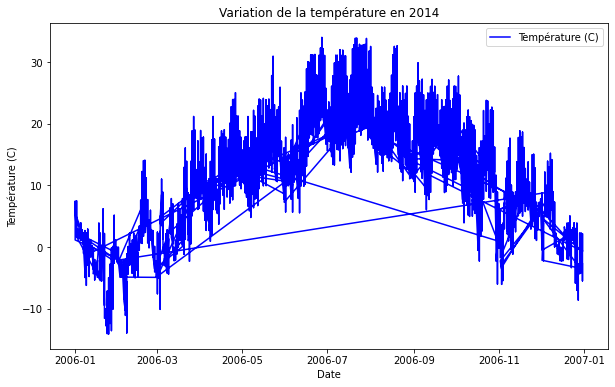

In [65]:
import matplotlib.pyplot as plt

df_2014 = df[df["Date"].dt.year == 2006]  # Filtrer pour l'année 2014

plt.figure(figsize=(10, 6))
plt.plot(df_2014["Date"], df_2014["Temperature (C)"], label="Température (C)", color="blue")
plt.xlabel("Date")
plt.ylabel("Température (C)")
plt.title("Variation de la température en 2014")
plt.legend()
plt.show()
